# Running ParlaSpeechHR Models

## [0] Start here:

In [1]:
google_colabbing = False
debug_printing = True

testing_asr = True # if False, cuts audio into chunks
shuffle_transcript = True

In [2]:
work_version_num = 3.5
word_version_preffix = ""
word_version_suffix = "_both"
work_version = f"{word_version_preffix}v{work_version_num}{word_version_suffix}"

print(work_version)

v3.5_both


## [INFO ABOUT MACHINE]

In [7]:
### NEED TO REINSTALL PYTORCH WITH CUDA ENABLED AND TRY AGAIN I GUESS

In [8]:
import cpuinfo

info = cpuinfo.get_cpu_info()

print("Processor:", info["brand_raw"])
print("Architecture:", info["arch"])
print("Cores:", info["count"])

Processor: 11th Gen Intel(R) Core(TM) i5-11600 @ 2.80GHz
Architecture: X86_64
Cores: 12


In [9]:
#!pip install pyopencl

import pyopencl as cl

# Get a list of all available platforms
platforms = cl.get_platforms()

for platform in platforms:
    print(f"Platform: {platform.name}")
    print(f"Vendor: {platform.vendor}")
    print(f"Version: {platform.version}")

    # Get a list of all available devices for the current platform
    devices = platform.get_devices()
    for device in devices:
        print(f"\nDevice: {device.name}")
        print(f"Type: {cl.device_type.to_string(device.type)}")
        print(f"Max Compute Units: {device.max_compute_units}")
        print(f"Max Work Item Dimensions: {device.max_work_item_dimensions}")
        print(f"Max Work Group Size: {device.max_work_group_size}")
        print(f"Max Clock Frequency: {device.max_clock_frequency} MHz")
        print(f"Global Memory Size: {device.global_mem_size / (1024 ** 3):.2f} GB")
        print(f"Local Memory Size: {device.local_mem_size / 1024:.2f} KB")
        print(f"Max Memory Allocation Size: {device.max_mem_alloc_size / (1024 ** 3):.2f} GB")
        print(f"OpenCL Version: {device.opencl_c_version}")
        print(f"Driver Version: {device.driver_version}")


Platform: NVIDIA CUDA
Vendor: NVIDIA Corporation
Version: OpenCL 1.2 CUDA 11.1.96

Device: GeForce GTX 760
Type: ALL | GPU
Max Compute Units: 6
Max Work Item Dimensions: 3
Max Work Group Size: 1024
Max Clock Frequency: 1150 MHz
Global Memory Size: 4.00 GB
Local Memory Size: 48.00 KB
Max Memory Allocation Size: 1.00 GB
OpenCL Version: OpenCL C 1.2 
Driver Version: 456.71
Platform: Intel(R) OpenCL HD Graphics
Vendor: Intel(R) Corporation
Version: OpenCL 3.0 

Device: Intel(R) UHD Graphics 750
Type: ALL | GPU
Max Compute Units: 32
Max Work Item Dimensions: 3
Max Work Group Size: 256
Max Clock Frequency: 1300 MHz
Global Memory Size: 6.32 GB
Local Memory Size: 64.00 KB
Max Memory Allocation Size: 3.16 GB
OpenCL Version: OpenCL C 1.2 
Driver Version: 30.0.101.1273
Platform: Intel(R) OpenCL
Vendor: Intel(R) Corporation
Version: OpenCL 3.0 WINDOWS

Device: 11th Gen Intel(R) Core(TM) i5-11600 @ 2.80GHz
Type: ALL | CPU
Max Compute Units: 12
Max Work Item Dimensions: 3
Max Work Group Size: 8192
M

CPU VERSION:
Device: 11th Gen Intel(R) Core(TM) i5-11600 @ 2.80GHz
Type: ALL | CPU
Max Compute Units: 12
Max Work Item Dimensions: 3
Max Work Group Size: 8192
Max Clock Frequency: 2800 MHz
Global Memory Size: 15.80 GB
Local Memory Size: 32.00 KB
Max Memory Allocation Size: 7.90 GB
OpenCL Version: OpenCL C 3.0 
Driver Version: 2023.16.6.0.28_042959

In [5]:
!pip show torch
!pip show torchvision
!pip show torchaudio

Name: torch
Version: 2.3.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages
Requires: filelock, fsspec, jinja2, mkl, networkx, sympy, typing-extensions
Required-by: accelerate, optimum, sentence-transformers, torchaudio, torchvision


Name: torchvision
Version: 0.15.2a0
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages
Requires: numpy, pillow, requests, torch
Required-by: sentence-transformers


Name: torchaudio
Version: 2.3.1
Summary: An audio package for PyTorch
Home-page: https://github.com/pytorch/audio
Author: Soumith Chintala, David Pollack, Sean Naren, Peter Goldsborough, Moto Hira, Caroline Chen, Jeff Hwang, Zhaoheng Ni, Xiaohui Zhang
Author-email: soumith@pytorch.org
License: 
Location: C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages
Requires: torch
Required-by: 


In [21]:
import torch


if torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 3.7:
    device = torch.device("cuda:0")  # Use GPU
    print("Using GPU:", torch.cuda.get_device_name(0))
    print("CUDA available:", torch.cuda.is_available())
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
    print("Device Name:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")  # Use CPU
    print("CUDA not available or GPU is too old.")
    print(f"device set to: CPU ({device})")
    

CUDA not available or GPU is too old.
device set to: CPU (cpu)


## [1] Install all required packages

In [3]:
#!pip install ipython
from IPython.display import clear_output

try:
    import transformers
    print("transformers: All good.")
except ImportError:
    !pip install transformers
    print("transformers: Installed.")

try:
    import pydub
    print("pydub: All good.")
except ImportError:
    !pip install pydub
    print("pydub: Installed.")

try:
    import torchaudio
    print("torchaudio: All good.")
except ImportError:
    !pip install torchaudio
    print("torchaudio: Installed.")

try:
    import pyctcdecode
    print("pyctcdecode: All good.")
except ImportError:
    !pip install pyctcdecode
    print("pyctcdecode: Installed.")

try:
    import jiwer
    print("jiwer: All good.")
except ImportError:
    !pip install jiwer
    print("jiwer: Installed.")

try:
    import nltk
    nltk.download('punkt')
    print("nltk: All good.")
except ImportError:
    !pip install nltk
    print("nltk: Installed.")

try:
    from fuzzywuzzy import fuzz
    print("fuzzywuzzy: All good.")
except ImportError:   
    !pip install fuzzywuzzy
    print("fuzzywuzzy: Installed.")

clear_output(wait=True) # clean the mess
print(f"All good. Every essential package is present to make the code work.")

All good. Every essential package is present to make the code work.


In [4]:
try:
    import kenlm
    print(f"All good. kenlm is present to make the LM model.")
except ImportError:
    !pip install https://github.com/kpu/kenlm/archive/master.zip # requires runtime restart
    import os
    os.kill(os.getpid(), 9) # restart automatically

All good. kenlm is present to make the LM model.


## [2] Defining all paths

In [12]:
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

path_to_pshr_models = r"D:\ASR\ParlaspeechHR"
path_to_pshr_wav2vec2_l = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavih-hr"
path_to_pshr_wav2vec2_l_lm = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm"

test_audio_path = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm\nela_film_review.ogg"

In [4]:
# # Mount gdrive and place path (private, no download)
# from google.colab import drive
# drive.mount("/content/drive")

# model_file_path = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr"
# output_folder = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr/temp"

# model_file_path_lm = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr-lm"
# output_folder_lm = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr-lm/temp"

## [3] Downloading wav2vec2 (plain or WithLM)

In [13]:
import os
import subprocess

if google_colabbing:
    from google.colab import drive
    drive.mount("/content/drive")

    # Check if the directory exists
    if not os.path.exists("/content/wav2vec2-large-slavic-parlaspeech-hr"):
        # Clone the repository if it doesn't exist
        print(f"Downloading to GDRIVE ~2 GB! /wav2vec2-large-slavic-parlaspeech-hr")
        subprocess.run("git clone https://huggingface.co/classla/wav2vec2-large-slavic-parlaspeech-hr", shell=True, check=True)
        os.makedirs("/content/wav2vec2-large-slavic-parlaspeech-hr/temp", exist_ok=True)
    else:
        print("wav2vec2-large-slavic-parlaspeech-hr already exists.")

    model_file_path = "/content/wav2vec2-large-slavic-parlaspeech-hr"
    print(f"\nUsing model from path: {model_file_path}")

else:
    path_to_pshr_wav2vec2_l = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr"
    path_to_pshr_wav2vec2_l_lm = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm"

    # Check if the directories exist and clone if they don't
    if not os.path.exists(path_to_pshr_wav2vec2_l):
        print(f"Downloading LOCALLY ~2 GB! /wav2vec2-large-slavic-parlaspeech-hr")
        subprocess.run(f"git clone https://huggingface.co/classla/wav2vec2-large-slavic-parlaspeech-hr {path_to_pshr_wav2vec2_l}", shell=True, check=True)
        os.makedirs(f"{path_to_pshr_wav2vec2_l}/temp", exist_ok=True)
    else:
        print("wav2vec2-large-slavic-parlaspeech-hr already exists.")

    if not os.path.exists(path_to_pshr_wav2vec2_l_lm):
        print(f"Downloading LOCALLY ~2 GB! /wav2vec2-large-slavic-parlaspeech-hr-LM")
        subprocess.run(f"git clone https://huggingface.co/classla/wav2vec2-large-slavic-parlaspeech-hr-lm {path_to_pshr_wav2vec2_l_lm}", shell=True, check=True)
        os.makedirs(f"{path_to_pshr_wav2vec2_l_lm}/temp", exist_ok=True)
    else:
        print("wav2vec2-large-slavic-parlaspeech-hr-lm already exists.")

    model_file_path = path_to_pshr_wav2vec2_l
    model_lm_file_path = path_to_pshr_wav2vec2_l_lm
    print(f"\nUsing model from path: {model_file_path}")
    print(f"Using LM model from path: {model_lm_file_path}\n")

print("Running locally, BOTH GOOD, good luck")


wav2vec2-large-slavic-parlaspeech-hr already exists.
wav2vec2-large-slavic-parlaspeech-hr-lm already exists.

Using model from path: D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr
Using LM model from path: D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm

Running locally, BOTH GOOD, good luck


## [4] Initilize the model!

In [99]:
from transformers import (
    Wav2Vec2Processor,
    Wav2Vec2ProcessorWithLM,
    Wav2Vec2ForCTC,
    Wav2Vec2FeatureExtractor,
    Wav2Vec2CTCTokenizer,
    Wav2Vec2Config,
    AutoModelForCTC,
    AutoProcessor,
)
import torch
import os
import kenlm
from pyctcdecode import BeamSearchDecoderCTC, build_ctcdecoder

# Set device as GPU, default is CPU
if torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 3.7:
    device = torch.device("cuda:0")
    print("Using GPU:", torch.cuda.get_device_name(0))
    print("CUDA available:", torch.cuda.is_available())
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
    print("Device Name:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA not available or GPU is too old.")
    print(f"device set to: CPU ({device})")
print(f"device: {device}")

config_file_path = os.path.join(model_file_path, "config.json")
config_lm_file_path = os.path.join(model_lm_file_path, "config.json")
#config_json = Wav2Vec2Config.from_json_file(config_file_path)

# Make the non-LM model components
def make_non_lm_components(model_file_path, device):
    # Make the tokenizer
    print(f"Making tokenizer0...")
    tokenizer0 = Wav2Vec2CTCTokenizer(
                                    os.path.join(model_file_path, "vocab.json"),
                                    unk_token="[UNK]",
                                    pad_token="[PAD]",
                                    word_delimiter_token="|"
                                )

    # Make feature extractor
    print(f"Making feature_extractor0...")
    feature_extractor0 = Wav2Vec2FeatureExtractor(
                                    feature_size=1,
                                    sampling_rate=16000,
                                    padding_value=0.0,
                                    do_normalize=True,
                                    return_attention_mask=True
                                )

    # Make the processor
    print(f"Making processor0...")
    processor0 = Wav2Vec2Processor(tokenizer=tokenizer0, feature_extractor=feature_extractor0)

    # Make the model
    print(f"Making model0... device {device}")
    model0 = Wav2Vec2ForCTC.from_pretrained(model_file_path, config=config_file_path).to(device)
    model0.eval()

    print("Non-LM components are active.")
    return processor0, model0

processor0, model0 = make_non_lm_components(model_file_path, device)

# Make the LM model components
def make_lm_components(model_lm_file_path, device):
    
    print(f"Making processor0lm...")
    #processor0lm = AutoProcessor.from_pretrained(model_lm_file_path)
    processor0lm = Wav2Vec2ProcessorWithLM.from_pretrained(model_lm_file_path)

    vocab_lm_path = os.path.join(model_lm_file_path, "vocab.json")
    
    print(f"Making tokenizer0lm...")
    tokenizer0lm = Wav2Vec2CTCTokenizer(
        vocab_lm_path,
        unk_token="[UNK]",
        pad_token="[PAD]",
        word_delimiter_token="|"
    )
    print(f"Making feature_extractor0lm...")
    feature_extractor0lm = Wav2Vec2FeatureExtractor(
        feature_size=1,
        sampling_rate=16000,
        padding_value=0.0,
        do_normalize=True,
        return_attention_mask=True
    )
    print(f"Making model0lm... device {device}")
    model0lm = Wav2Vec2ForCTC.from_pretrained(model_lm_file_path, config=config_lm_file_path).to(device) ##aded config_lm_file_path
    model0lm.eval()

    print("LM components are active.")
    return processor0lm, model0lm

processor0lm, model0lm = make_lm_components(model_lm_file_path, device)


CUDA not available or GPU is too old.
device set to: CPU (cpu)
device: cpu
Making tokenizer0...
Making feature_extractor0...
Making processor0...
Making model0... device cpu


Some weights of the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
Y

Non-LM components are active.
Making processor0lm...


Only 1 unigrams passed as vocabulary. Is this small or artificial data?


Making tokenizer0lm...
Making feature_extractor0lm...
Making model0lm... device cpu


Some weights of the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.origina

LM components are active.


## [5] Define cutting down into temp chunks (now with DYNAMICS)

## def process_transcribe for both

In [109]:
import torchaudio
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt

TIME_CHUNK = 20
target_sr = 16000

SILENCE_THRESHOLD = 0.01  # Threshold to detect silence
MIN_SILENCE_LENGTH = 0.5  # Minimum length of silence to be considered a split point in seconds

print(f"Is debug_printing on? {debug_printing}\n")

### PROCESSING ENGINE ###

def process_transcribe(input_file, processor=processor0, model=model0):
    
        # Begin processing:
        speech, sample_rate = torchaudio.load(input_file)

        # Check if resampling is needed
        if sample_rate != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
            speech = resampler(speech)

        # Process the speech with the processor
        input_values = processor0(speech, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)

        if debug_printing == True:
          print(input_values.shape)

        if input_values.dim() == 3:  # If the shape is [1, 1, audio_length]
            input_values = input_values.squeeze(0)  # Squeeze to [1, audio_length]

        if debug_printing == True:
          print(input_values.shape)

        # Perform inference
        with torch.no_grad():
            logits = model0(input_values).logits

        if debug_printing == True:
         print("Logits shape:", logits.shape)

        # Get the predicted token IDs (greedy decoding)
        predicted_ids = torch.argmax(logits, dim=-1)

        if debug_printing == True:
          print("Predicted IDs shape:", predicted_ids.shape)

        # Convert predicted IDs to numpy array
        predicted_ids = predicted_ids.cpu().numpy()

        if debug_printing == True:
          print("Predicted IDs (numpy):", predicted_ids)

        # Decode the predicted IDs
        transcription = processor0.batch_decode(predicted_ids)[0]

        transcription = transcription.replace("<pad>", "").strip()

        if debug_printing == True:
          print("Transcription-depadded:", transcription)
            

        return transcription



def transcribe(input_file, output_folder, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK):
    # Load the audio
    waveform, orig_sr = torchaudio.load(input_file)

    # Check if resampling is needed
    if orig_sr != target_sr:
        resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=target_sr)
        waveform = resampler(waveform)

    # Determine the output file name and format (always WAV)
    base_name = os.path.splitext(os.path.basename(input_file))[0]

    # Convert waveform to numpy array for easier processing
    waveform_np = waveform.squeeze().numpy()


################### RUN THE WHOLE AUDIO FILES ##########################
    if testing_asr == True:
            # Directly process the entire audio without chunking
            #output_file = os.path.join(output_folder, f"{base_name}_whole.wav")
            #torchaudio.save(output_file, waveform, sample_rate=target_sr)
            tekst = process_transcribe(input_file, processor=processor0, model=model0)
            # print(f"Transcription for {base_name}: {tekst}")
            print(tekst)
            #os.remove(output_file)  # Optionally delete the temporary WAV file
    
######### ELSE CHUNKS BASED ON TIME_CHUNK INCREMENTS ##################
    else:
        # Function to detect silence points
        def find_silence_points(signal, threshold, min_silence_length, sr):
            silence_points = []
            min_silence_samples = int(min_silence_length * sr)
            is_silence = np.abs(signal) < threshold
            silence_length = 0
            for i in range(len(is_silence)):
                if is_silence[i]:
                    silence_length += 1
                    if silence_length >= min_silence_samples:
                        silence_points.append(i)
                else:
                    silence_length = 0
            return silence_points


        # Find silence points in the audio
        silence_points = find_silence_points(waveform_np, SILENCE_THRESHOLD, MIN_SILENCE_LENGTH, target_sr)
    
        if debug_printing == True:
    
            print(f"Plotting point where silence ({len(silence_points)} points) has been detected in {input_file}")
            # Plot the waveform and silence points
            plt.figure(figsize=(15, 5))
            plt.plot(waveform_np, label='Waveform')
            plt.scatter(silence_points, waveform_np[silence_points], color='red', marker='x', label='Silence Points')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.title('Waveform with Silence Points')
            plt.legend()
            plt.show()
    
        # Split the audio at silence points
        chunk_start = 0
        for i, point in enumerate(silence_points):
            chunk_end = point
            if chunk_end - chunk_start >= TIME_CHUNK * target_sr:
                chunk = waveform[:, chunk_start:chunk_end]
                output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{i}.wav")
                torchaudio.save(output_file, chunk, sample_rate=target_sr)
    
                # Process the temporary WAV file
                tekst = process_transcribe(input_file, processor=processor0, model=model0)
                time = format_time(chunk_start / target_sr)
                print(f"[{time}] {tekst}")
    
                # Optionally, you can delete the temporary WAV file after processing
                os.remove(output_file)
    
                chunk_start = chunk_end
                
        def format_time(seconds):
            minutes = int(seconds // 60)
            seconds = int(seconds % 60)
            return f"{minutes:02d}:{seconds:02d}"
    
        # Process the remaining audio if any
        if chunk_start < waveform.size(1):
            chunk = waveform[:, chunk_start:]
            output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{len(silence_points)}.wav")
            torchaudio.save(output_file, chunk, sample_rate=target_sr)
            tekst = process_transcribe(input_file, processor=processor0, model=model0)
            time = format_time(chunk_start / target_sr)
            print(f"[{time}] {tekst}")
            os.remove(output_file)





#### L M #########



def process_transcribe_lm(input_file, processor=processor0lm, model=model0lm):

    if debug_printing:
        print(f"input_file type {type(input_file)}")
        print(f"input_file {input_file}")
    # Load audio and perform ASR using wav2vec2 with LM
    speech, sample_rate = torchaudio.load(input_file)
    
    # Check if resampling is needed
    target_sr = 16000  # Example target sampling rate
    if sample_rate != target_sr:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
        speech = resampler(speech)
    
    # Process the speech with the processor
    input_values = processor(speech, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)

    if debug_printing:
        print("Input values shape:", input_values.shape)

    # Ensure input_values has correct shape for model0lm
    input_values = input_values.squeeze(0)  # Assuming batch_size=1

    if debug_printing:
        print("Adjusted input values shape:", input_values.shape)

    # Perform inference
    with torch.no_grad():  # Inference mode
        logits = model(input_values).logits

    if debug_printing:
        print("Logits shape after processing:", logits.shape)
        #print("Logits max value:", np.amax(logits, axis=1))

    # if debug_printing:
    #     print("Logits shape:", logits.shape)

    # Decode the predicted IDs
    transcriptions = processor0lm.batch_decode(logits.numpy()).text

    # Ensure transcription is returned as a string
    transcription = transcriptions[0] if transcriptions else ""  # Assuming batch_size=1


    if debug_printing:
        print("Transcription:", transcription)

    return transcription



def transcribe_lm(input_file, output_folder, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK):
    # Load the audio
    waveform, orig_sr = torchaudio.load(input_file)

    # Check if resampling is needed
    if orig_sr != target_sr:
        resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=target_sr)
        waveform = resampler(waveform)

    # Determine the output file name and format (always WAV)
    base_name = os.path.splitext(os.path.basename(input_file))[0]

    # Convert waveform to numpy array for easier processing
    waveform_np = waveform.squeeze().numpy()

   
    if testing_asr:
################### RUN THE WHOLE AUDIO FILES ##########################
        tekst = process_transcribe_lm(input_file, processor=processor0lm, model=model0lm)
        print(f"LM p_t_l Transcription for {base_name}: {tekst}")
    
        #return tekst

    else:
        # Function to detect silence points
        def find_silence_points(signal, threshold, min_silence_length, sr):
            silence_points = []
            min_silence_samples = int(min_silence_length * sr)
            is_silence = np.abs(signal) < threshold
            silence_length = 0
            for i in range(len(is_silence)):
                if is_silence[i]:
                    silence_length += 1
                    if silence_length >= min_silence_samples:
                        silence_points.append(i)
                else:
                    silence_length = 0
            return silence_points


        # Find silence points in the audio
        silence_points = find_silence_points(waveform_np, SILENCE_THRESHOLD, MIN_SILENCE_LENGTH, target_sr)
    
        if debug_printing == True:
    
            print(f"Plotting point where silence ({len(silence_points)} points) has been detected in {input_file}")
            # Plot the waveform and silence points
            plt.figure(figsize=(15, 5))
            plt.plot(waveform_np, label='Waveform')
            plt.scatter(silence_points, waveform_np[silence_points], color='red', marker='x', label='Silence Points')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.title('Waveform with Silence Points')
            plt.legend()
            plt.show()
    
        # Split the audio at silence points
        chunk_start = 0
        for i, point in enumerate(silence_points):
            chunk_end = point
            if chunk_end - chunk_start >= TIME_CHUNK * target_sr:
                chunk = waveform[:, chunk_start:chunk_end]
                output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{i}.wav")
                torchaudio.save(output_file, chunk, sample_rate=target_sr)
    
                # Process the temporary WAV file
####################################################################
                tekst = process_transcribe_lm(input_file, processor=processor0lm, model=model0lm)
                time = format_time(chunk_start / target_sr)
                print(f"[{time}] {tekst}")
    
                # Optionally, you can delete the temporary WAV file after processing
                os.remove(output_file)
    
                chunk_start = chunk_end
                
        def format_time(seconds):
            minutes = int(seconds // 60)
            seconds = int(seconds % 60)
            return f"{minutes:02d}:{seconds:02d}"
    
        # Process the remaining audio if any
        if chunk_start < waveform.size(1):
            chunk = waveform[:, chunk_start:]
            output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{len(silence_points)}.wav")
            torchaudio.save(output_file, chunk, sample_rate=target_sr)
####################################################################
            tekst = process_transcribe_lm(input_file, processor=processor0lm, model=model0lm)
            
            time = format_time(chunk_start / target_sr)
            print(f"[{time}] {tekst}")
            os.remove(output_file)


print(f"Transcription function defined and active: \nSplitting audio in: {TIME_CHUNK}s segments (dynamically). \n")


Is debug_printing on? False

Transcription function defined and active: 
Splitting audio in: 20s segments (dynamically). 



In [90]:
debug_printing = True

## [6] Quick test to verify

In [91]:
path_to_pshr_wav2vec2_l = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavih-hr\wav2vec2-large-slavic-parlaspeech-hr"
path_to_pshr_wav2vec2_l_lm = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm"

#test_audio_path_pc = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm\nela_film_review.ogg" # WORKS WELL
test_audio_path_pc = r"D:\ASR\ParlaspeechHR\ivan_snimka.opus"

In [110]:
if testing_asr == True:
    print(f"No chunking. Per file basis. (testing_asr = {testing_asr})\n")
else:
    print(f"Chunking audio! Using silence points. (testing_asr = {testing_asr})\n")


if google_colabbing == True:

    test_audio_path = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr-lm/ivan_snimka.opus"
    test_audio_temp = "/content/wav2vec2-large-slavic-parlaspeech-hr/temp"
    
else:
    # ACOUSTIC MODEL
    test_audio_path = test_audio_path_pc
    test_audio_temp = path_to_pshr_wav2vec2_l + r"\temp"
    transcribe(test_audio_path, test_audio_temp, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK)

    # LM MODEL
    test_audio_temp_lm = path_to_pshr_wav2vec2_l_lm + r"\temp"
    transcribe_lm(test_audio_path, test_audio_temp_lm, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK)


No chunking. Per file basis. (testing_asr = True)

sada ti šaljem glasovnu poruku i ne znam šta pričam ali evo pričam znači ovo tu mi je trebalo jedno 30 sati da dođem do ovog trenutka pričem normlno razgovjetno i nadam se da će transkripcija biti dobra naime ja to nisam izmislio nego su to zapravo r slovensa uzeli od facboka model i strenirali ga na govoru iz parlamenta specifično za hrvatski jeziki


Parallel batch decoding is not currently supported in this platform. Falling back to sequential decoding.


LM p_t_l Transcription for ivan_snimka: sada ti šaljem glasovnu poruku i ne znam šta pričamali evopričam znači ovo tu mi je trebalo jedno 30sati da dođem do ovog trenutka pričemnoralo razgovjetno i nadam se daće transkripcija biti dobra naime ja to nisam izmislio nego su tozapravo 3 slovensa uzeli od facboka model istreniraliga na govoru iz parlamenta specifično za hrvatski jeziku


In [111]:
# Check the vocabulary size of the processor
vocab_size_lm = len(processor0lm.tokenizer.get_vocab())

vocab_size = len(processor0.tokenizer.get_vocab())
print(f"Vocabulary size: {vocab_size}, LM: {vocab_size_lm}")

Vocabulary size: 51, LM: 51


# MODEL IS NOW OPERATIONAL

## [7] Prepare to run ling analysis

In [60]:
%%time

import os

# Directory containing audio files
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"

# List all files in the directory
audio_files = os.listdir(path_to_pshr_raw_audio_data)

# Count the number of audio files
num_audio_files = len(audio_files)

print(f"Number of audio files in '{path_to_pshr_raw_audio_data}': {num_audio_files}\n")

# JSONL file containing metadata
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

# Counting lines in the JSONL file
num_entries = 0
with open(path_to_pshr_raw_jsonl, 'r', encoding='utf-8') as f:
    for line in f:
        num_entries += 1

print(f"Number of entries in '{path_to_pshr_raw_jsonl}': {num_entries}\n")


Number of audio files in 'D:\ParlaSpeech-HR.v1.0\raw': 403925

Number of entries in 'D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl': 403925

CPU times: total: 578 ms
Wall time: 5.59 s


In [61]:
import os
import json

# Paths to your data
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

# Limit number of transcriptions to print
limit = 2
count = 0

# Read JSONL file
audio_transcriptions = {}
with open(path_to_pshr_raw_jsonl, 'r', encoding='utf-8') as jsonl_file:
    for line in jsonl_file:
        if count >= limit:
            break
        
        data = json.loads(line.strip())
        audio_filename = os.path.basename(data['path'])
        audio_transcriptions[audio_filename] = data['norm_words']  # Use 'norm_words' or other transcription field
        
        count += 1
        
audio_transcriptions = dict(sorted(audio_transcriptions.items()))

print(f"audio_transcriptions: {audio_transcriptions}")


audio_transcriptions: {'seg.-k1z8behXXg_14758.42-14778.39.flac': ['km', 'i', 'distribuira', 'ih', 'na', 'nekih', 'dvije', 'tisuće', 'šesto', 'priključaka', 'zahvaća', 'još', 'rubne', 'dijelove', 'nekih', 'drugih', 'lokalnih', 'jedinica', 'mogu', 'reć', 'da', 'ima', 'samo', 'osam', 'zaposlenih', 'ukupno', 'prihode', 'u', 'iznosu', 'od', 'četiriosam', 'milijuna', 'kuna', 'vrijednost', 'imovine', 'društva', 'četrdeset', 'pet', 'milijuna', 'kuna', 'evo', 'dvije', 'tisuće', 'četrnaest', 'do', 'dvije', 'tisuće', 'osamnaest', 'je', 'realizirano', 'je', 'ukupno'], 'seg.qNpeHxO0WzA_1967.6-1986.11.flac': ['primjeni', 'željezničkih', 'paketa', 'kojima', 'se', 'postupno', 'i', 'nezaustavljivo', 'stvara', 'jedinstveni', 'europski', 'željeznički', 'prostor', 'provedba', 'ovog', 'zakona', 'nema', 'financijski', 'utjecaj', 'na', 'državni', 'proračun', 'hvala', 'lijepo', 'zahvaljujem', 'ministru', 'imamo', 'sedam', 'replika', 'prvi', 'je', 'kolega', 'kirin', 'izvolite']}


### Generiranje audio_transcriptions dict(sorted)

In [62]:
%%time

print(f"FULL AUDIO_TRANSCRIPTIONS HERE")

import os
import json

# Paths to your data
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

# Read JSONL file
audio_transcriptions = {}
with open(path_to_pshr_raw_jsonl, 'r', encoding='utf-8') as jsonl_file:
    for line in jsonl_file:
        data = json.loads(line.strip())
        audio_filename = os.path.basename(data['path'])
        audio_transcriptions[audio_filename] = data['norm_words']  # Use 'norm_words' or other transcription field

audio_transcriptions = dict(sorted(audio_transcriptions.items()))



FULL AUDIO_TRANSCRIPTIONS HERE
CPU times: total: 11.7 s
Wall time: 11.7 s


In [92]:
%%time

# Print limited number of audio_transcriptions
limit = 3
count = 0

print(f"Displaying first {limit} audio names w/ transcription:\n")

# List all files in the directory
all_files = os.listdir(path_to_pshr_raw_audio_data)

# Sort the files alphabetically or by any other criteria, if needed
all_files.sort()

# Select the first 10 files
first_10_files = all_files[:10]

print(f"debug_printing: {debug_printing}")

if debug_printing == True:
    # Debug prints
    print("First 10 Files:")
    print(first_10_files)
    print("\nAudio Transcriptions:")

for filename, transcription in audio_transcriptions.items():
    if count >= limit:
        break
    if debug_printing == True:
        print(f"{filename}: {transcription}")
    count += 1

# Step 3: Correlate audio files with transcriptions (limiting to 'limit' iterations)
print("\nCorrelating audio files with transcriptions:\n")
for i, audio_file in enumerate(first_10_files[:limit]):
    if audio_file in audio_transcriptions:
        transcription = ' '.join(audio_transcriptions[audio_file])
        print(f"Audio File:\n{audio_file}\n\nTranscription:\n{transcription}")
    else:
        print(f"No transcription found for {audio_file}")
    
    # Add a separator between iterations for clarity, except after the last item
    if i < (limit):
        print("-" * 30)
        print("\n")


Displaying first 3 audio names w/ transcription:

debug_printing: True
First 10 Files:
['seg.-EO06cT21uY_10038.21-10054.64.flac', 'seg.-EO06cT21uY_10111.7-10131.55.flac', 'seg.-EO06cT21uY_10131.55-10147.16.flac', 'seg.-EO06cT21uY_10148.69-10167.91.flac', 'seg.-EO06cT21uY_10167.91-10186.62.flac', 'seg.-EO06cT21uY_10187.44-10207.4.flac', 'seg.-EO06cT21uY_10207.4-10227.1.flac', 'seg.-EO06cT21uY_10227.1-10246.72.flac', 'seg.-EO06cT21uY_10246.72-10265.92.flac', 'seg.-EO06cT21uY_10266.15-10285.99.flac']

Audio Transcriptions:
seg.-EO06cT21uY_10038.21-10054.64.flac: ['lijepo', 'kolegice', 'i', 'kolege', 'nemojte', 'se', 'vi', 'varda', 'hihotat', 'prije', 'četirig', 'ste', 'izdali', 'birače', 'sad', 'jedva', 'čekam', 'da', 'vidim', 'kako', 'će', 'vas', 'nagradit', 'jedva', 'čekam', 'hvala', 'lijepo', 'kolegice', 'i', 'kolega', 'kolege', 'zastupnici', 'g', 'potpredsjedniče']
seg.-EO06cT21uY_10111.7-10131.55.flac: ['hadeze', 'želi', 'pokušati', 'dati', 'obećanje', 'za', 'šest', 'mjeseci', 'da', 

# TESTING TRANSCRIPTIONS now

In [ ]:
# Iterate over the first 5 .flac files
for i, audio_file in enumerate(all_files[:5]):
    if audio_file.endswith('.flac'):
        flac_audio_path = os.path.join(path_to_pshr_raw_audio_data, audio_file)
        transcribe(flac_audio_path, test_audio_temp)
    else:
        print(f"Skipping non-FLAC file: {audio_file}")

    # Add a separator between iterations for clarity
    if i < 4:  # Adjust the limit based on the number of files you want to process
        print("-" * 30)

In [63]:
## NEW

import os
from jiwer import wer
from fuzzywuzzy import fuzz

similarity_threshold = 50  # Example threshold, can be adjusted based on requirements
max_search_distance = 3  # Maximum number of tokens to search ahead for a match

# Function to tokenize text by removing dots and commas, then splitting into tokens
def tokenize_text(text):
    # Remove dots and commas
    if debug_printing == True:
        print(f"Type of text: {type(text)}")
    
    text = text.replace('.', '').replace(',', '')
    # Convert to lowercase and split into tokens
    tokens = text.lower().split()
    return tokens

# Function to normalize numbers within tokens
def normalize_numbers(tokens, norm_nums):
    def decompose_number(num):
        components = []
        if num >= 1000:
            thousands = num // 1000 * 1000
            components.append(thousands)
            num %= 1000
        if num >= 100:
            hundreds = num // 100 * 100
            components.append(hundreds)
            num %= 100
        if num >= 20:
            tens = num // 10 * 10
            components.append(tens)
            num %= 10
        if num > 0:
            components.append(num)
        return components

    normalized_tokens = []
    for token in tokens:
        if token.isdigit():
            num = int(token)
            components = decompose_number(num)
            for component in components:
                if component in norm_nums:
                    normalized_tokens.append(norm_nums[component])
        elif token.lower() in norm_nums:
            normalized_tokens.append(norm_nums[token.lower()])
        else:
            normalized_tokens.append(token)
    
    # Flatten the list in case there are combined tokens like "dvije tisuće"
    flattened_tokens = []
    for token in normalized_tokens:
        if ' ' in token:
            flattened_tokens.extend(token.split())
        else:
            flattened_tokens.append(token)
    
    return flattened_tokens
    


# OLD BUT GOOD Function to normalize numbers based on the predefined mapping
# def normalize_numbers(tokens, norm_nums):
#     normalized_tokens = []
#     for token in tokens:
#         if token.lower() in norm_nums:
#             normalized_tokens.append(norm_nums[token.lower()])
#         elif token.isdigit() and int(token) in norm_nums:
#             normalized_tokens.append(norm_nums[int(token)])
#         else:
#             normalized_tokens.append(token)
#     return normalized_tokens

# Function to align ASR tokens with original tokens based on character similarity
def align_tokens(original_tokens, asr_tokens, similarity_threshold=similarity_threshold):
    aligned_asr_tokens = []
    asr_index = 0
    
    for original_token in original_tokens:
        found_match = False
        search_end = min(asr_index + max_search_distance, len(asr_tokens))
        for i in range(asr_index, search_end):
            asr_token = asr_tokens[i]
            similarity = fuzz.ratio(original_token, asr_token)
            
            if debug_printing == True:
                print(f"Comparing original token '{original_token}' with ASR token '{asr_token}': Similarity = {similarity}")
                
            if similarity >= similarity_threshold:
                # Found a match, so align both original and ASR tokens
                aligned_asr_tokens.append(asr_token)
                asr_index = i + 1  # Move the ASR index forward
                found_match = True
                
                if debug_printing == True:
                    print(f"Match found for '{original_token}' with '{asr_token}'")
                    
                break
        
        if not found_match:
            # No match found within the search distance, handle as needed (optional)
            # For simplicity, you can decide to skip or handle cases where no match is found
            if debug_printing == True:
                print(f"No match found for '{original_token}', handling case...")
    
    if debug_printing == True:
        print(f"Aligned ASR tokens: {aligned_asr_tokens}\n")
        
    return aligned_asr_tokens

print(f"Functions online.")

Functions online.


## Definiranje znamenki (robustnost)

In [64]:
# Define the mappings for numbers in Croatian
norm_nums = {
    1: 'jedan',
    2: 'dva',
    3: 'tri',
    4: 'četiri',
    5: 'pet',
    6: 'šest',
    7: 'sedam',
    8: 'osam',
    9: 'devet',
    10: 'deset',
    11: 'jedanaest',
    12: 'dvanaest',
    13: 'trinaest',
    14: 'četrnaest',
    15: 'petnaest',
    16: 'šesnaest',
    17: 'sedamnaest',
    18: 'osamnaest',
    19: 'devetnaest',
    20: 'dvadeset',
    30: 'trideset',
    40: 'četrdeset',
    50: 'pedeset',
    60: 'šezdeset',
    70: 'sedamdeset',
    80: 'osamdeset',
    90: 'devedeset',
    100: 'sto',
    200: 'dvjesto',
    300: 'tristo',
    400: 'četiristo',
    500: 'petsto',
    600: 'šesto',
    700: 'sedamsto',
    800: 'osamsto',
    900: 'devetsto',
    1000: 'tisuća',
    2000: 'dvije tisuće',  # Two thousand
    3000: 'tri tisuće',    # Three thousand
    4000: 'četiri tisuće', # Four thousand
    5000: 'pet tisuća',    # Five thousand
    6000: 'šest tisuća',   # Six thousand
    7000: 'sedam tisuća',  # Seven thousand
    8000: 'osam tisuća',   # Eight thousand
    9000: 'devet tisuća',  # Nine thousand
}

# Create the reverse mapping for Croatian numbers
norm_nums_reverse = {value: key for key, value in norm_nums.items()}


In [65]:
# Example usage
tekst = "Ovo je 2012. godina, zar ne"

asr_tokens = tokenize_text(tekst)
print("Tokens:", asr_tokens)

normalized_tokens = normalize_numbers(asr_tokens, norm_nums)
normalized_tokens = normalized_tokens
print("Normalized Tokens:", normalized_tokens)

# Expected output
# Tokens: ['ovo', 'je', '2012', 'godina', 'zar', 'ne']
# Normalized Tokens: ['ovo', 'je', 'dvije', 'tisuće', 'dvanaest', 'godina', 'zar', 'ne']

Type of text: <class 'str'>
Tokens: ['ovo', 'je', '2012', 'godina', 'zar', 'ne']
Normalized Tokens: ['ovo', 'je', 'dvije', 'tisuće', 'dvanaest', 'godina', 'zar', 'ne']


## Run WER matching

In [122]:
debug_printing = False
WER_results = []

import os
import json


dict_file_path = path_to_pshr_models
wer_plot_save_path = path_to_pshr_models

dict_main_name = f"WER_results_{work_version}.json"

old_default_version = "v3.3"
old_dict_main_name = f"WER_results_{old_default_version}.json"


dict_file_path_full = os.path.join(dict_file_path, dict_main_name)
old_dict_file_path_full = os.path.join(dict_file_path, old_dict_main_name)

# Check if the file for the current work version exists
if os.path.exists(dict_file_path_full):
    print(f"Loading WER_results for CURRENT VERSION...")
    # Load existing data from JSON file for current version
    with open(dict_file_path_full, "r") as f:
        WER_results = json.load(f)
    print(f"Loaded WER_results from: {dict_file_path_full}")
    wer_plot_from_version = dict_main_name
    

# Check if the file for the old default version exists
elif os.path.exists(old_dict_file_path_full):
    print(f"Loading WER_results for OLD DEFAULT VERSION...")
    # Load existing data from JSON file for old default version
    with open(old_dict_file_path_full, "r") as f:
        WER_results = json.load(f)
    print(f"Loaded WER_results from: {old_dict_file_path_full}")
    wer_plot_from_version = old_dict_main_name

# Neither file exists, initialize WER_results as an empty list
else:
    WER_results = []
    print(f"No WER_results Dict found for either current or old default version.\nMaking a new empty one...")



Loading WER_results for CURRENT VERSION...
Loaded WER_results from: D:\ASR\ParlaspeechHR\WER_results_v3.5_both.json


In [123]:
%%time

# treba 4s po jednom audio fileu
import warnings
import random
from tqdm import tqdm
import json



# Variables to accumulate metrics
num_runs = 5  # Number of runs to average over (SAVES DICT EACH RUN)
max_files_to_process = 20  # Number of files to process per run (20 files = 1 min)

transcription_list = list(audio_transcriptions.items())

# Iterate over each run
for run in range(num_runs):
    total_asr_deletions = 0
    total_asr_additions = 0
    total_asr_substitutions = 0  # Total substitutions across all files
    total_tokens = 0
    #total_error_rate = 0.0
    total_asr_deletions_lm = 0
    total_asr_additions_lm = 0
    total_asr_substitutions_lm = 0
    n = 0  # Number of files processed
    
    # Shuffle the transcription list for each run if needed
    if shuffle_transcript == True:
        random.shuffle(transcription_list)
    
    # Use tqdm to show progress for processing each file in the run
    with tqdm(total=max_files_to_process, desc=f"Run {run+1}") as pbar:
        # Process up to max_files_to_process files for this run
        run_results = []
        for file_idx in range(min(max_files_to_process, len(transcription_list))):  # Ensure we don't exceed the list length
            input_file, transcription = transcription_list[file_idx]


            tekst = process_transcribe(os.path.join(path_to_pshr_raw_audio_data, input_file))

            # Get original transcription from dictionary
            original_transcription = ' '.join(audio_transcriptions[input_file])
            
            # Tokenize both transcriptions
            original_tokens = tokenize_text(original_transcription)
            asr_tokens = tokenize_text(tekst)
        
            # Normalize numbers in ASR tokens
            normalized_asr_tokens = normalize_numbers(asr_tokens, norm_nums)
        
            # Align ASR tokens with original tokens based on character similarity
            aligned_asr_tokens = align_tokens(original_tokens, normalized_asr_tokens, similarity_threshold=similarity_threshold)
        
            # Calculate error metrics
            asr_deletion = len(original_tokens) - len(aligned_asr_tokens)
            asr_addition = len(normalized_asr_tokens) - len(aligned_asr_tokens)
            
            # Calculate substitutions between original and aligned ASR tokens
            substitutions = 0
            for orig_token, asr_token in zip(original_tokens, aligned_asr_tokens):
                if orig_token != asr_token:
                    substitutions += 1
            
            total_asr_substitutions += substitutions
            total_tokens = len(original_tokens)
            #error_rate = (asr_deletion + asr_addition + substitutions) / total_tokens
        
            # Accumulate metrics
            total_asr_deletions += asr_deletion
            total_asr_additions += asr_addition
          

        ####### DOING THE SAME FOR LM MODEL NOW ################
            tekst_lm = process_transcribe_lm(os.path.join(path_to_pshr_raw_audio_data, input_file))

            
            asr_tokens_lm = tokenize_text(tekst_lm)
        
            # Normalize numbers in ASR tokens
            normalized_asr_tokens_lm = normalize_numbers(asr_tokens_lm, norm_nums)
        
            # Align ASR tokens with original tokens based on character similarity
            aligned_asr_tokens_lm = align_tokens(original_tokens, normalized_asr_tokens_lm, similarity_threshold=similarity_threshold)
        
            # Calculate error metrics
            asr_deletion_lm = len(original_tokens) - len(aligned_asr_tokens_lm)
            asr_addition_lm = len(normalized_asr_tokens_lm) - len(aligned_asr_tokens_lm)
            
            # Calculate substitutions between original and aligned ASR tokens
            substitutions_lm = 0
            for orig_token, asr_token_lm in zip(original_tokens, aligned_asr_tokens_lm):
                if orig_token != asr_token_lm:
                    substitutions_lm += 1
            
            total_asr_substitutions_lm += substitutions_lm
            #total_tokens = len(original_tokens)
            #error_rate = (asr_deletion_lm + asr_addition + substitutions) / total_tokens
        
            # Accumulate metrics
            total_asr_deletions_lm += asr_deletion_lm
            total_asr_additions_lm += asr_addition_lm
            #total_error_rate += error_rate
            
            n += 1


            # Store individual file results for this run including substitutions
            file_result = {
                "input_file": input_file,
                "tokens": total_tokens,
                "asr_deletions": asr_deletion,
                "asr_additions": asr_addition,
                "asr_substitutions": substitutions,
                "asr_deletions_lm": asr_deletion_lm,
                "asr_additions_lm": asr_addition_lm,
                "asr_substitutions_lm": substitutions_lm,
            }

            WER_results.append(file_result)  # Append to WER_results
        
            # Update tqdm progress bar
            pbar.update(1)
    
            # Print or use the error metric for each file as needed
            if debug_printing == True:
                print(f"Transcription {input_file}: {tekst}")
                print(f"original_tokens: \n{original_tokens}\n")
                print(f"asr_tokens: \n{asr_tokens}\n")
                print(f"normalized_asr_tokens: \n{normalized_asr_tokens}\n")
                print(f"aligned_asr_tokens: \n{aligned_asr_tokens}\n")
                print(f"aligned_asr_tokens LM: \n{aligned_asr_tokens_lm}\n")
                print(f"ASR Deletions: {asr_deletion}")
                print(f"ASR Additions: {asr_addition}")
                print(f"ASR Substitutions: {substitutions}\n")
                print(f"ASR Deletions LM: {asr_deletion_lm}")
                print(f"ASR Additions LM: {asr_addition_lm}")
                print(f"ASR Substitutions LM: {substitutions_lm}\n")
                print(f"Total Tokens: {len(original_tokens)}")
                # print(f"Error Rate (WER): {error_rate}\n")

      
        with open(dict_file_path_full, "w") as f:
            json.dump(WER_results, f, indent=4)
            
        if debug_printing == True:
            print(f"Saving dict to: {dict_file_path}\  \n\nFilename: {dict_main_name}\n")


print(f"\nSaved dict to: {dict_file_path}\  \n\nFilename: {dict_main_name}\n")

# Print number of runs
print(f"Number of runs: {num_runs}")
print(f"Total number of audio processed: {max_files_to_process*num_runs}\n")
print(f"Number of WER_results: {len(WER_results)}\n")


Run 5: 100%|███████████████████████████████████████████████████████████████████████████| 20/20 [02:09<00:00,  6.47s/it]


Saved dict to: D:\ASR\ParlaspeechHR\  

Filename: WER_results_v3.5_both.json

Number of runs: 5
Total number of audio processed: 100

Number of WER_results: 180

CPU times: total: 1h 34min 13s
Wall time: 9min 36s


In [ ]:
print(WER_results)

### Results WER_results

In [124]:
# Initialize variables to accumulate totals
overall_total_asr_deletions = 0
overall_total_asr_additions = 0
overall_total_asr_substitutions = 0
overall_total_tokens = 0

overall_total_asr_deletions_lm = 0
overall_total_asr_additions_lm = 0
overall_total_asr_substitutions_lm = 0

total_files_with_error_rate = 0
overall_total_error_rate = 0

# Iterate through WER_results
for result in WER_results:
    if isinstance(result, dict):
        overall_total_asr_deletions += result.get("asr_deletions", 0)
        overall_total_asr_additions += result.get("asr_additions", 0)
        overall_total_asr_substitutions += result.get("asr_substitutions", 0)
        overall_total_tokens += result.get("tokens", 0)
        
        overall_total_asr_deletions_lm += result.get("asr_deletions_lm", 0)
        overall_total_asr_additions_lm += result.get("asr_additions_lm", 0)
        overall_total_asr_substitutions_lm += result.get("asr_substitutions_lm", 0)
        
        if "error_rate" in result:
            total_files_with_error_rate += 1
            overall_total_error_rate += result["error_rate"]

# Calculate overall metrics
overall_wer = (overall_total_asr_deletions + overall_total_asr_additions + overall_total_asr_substitutions) / overall_total_tokens if overall_total_tokens > 0 else 0
overall_wer_lm = (overall_total_asr_deletions_lm + overall_total_asr_additions_lm + overall_total_asr_substitutions_lm) / overall_total_tokens if overall_total_tokens > 0 else 0
print(f"Overall Total Original Tokens: {overall_total_tokens}\n")

# Print overall totals including substitutions for non-LM and LM results
print(f"Overall Total ASR Deletions (Non-LM): {overall_total_asr_deletions}")
print(f"Overall Total ASR Additions (Non-LM): {overall_total_asr_additions}")
print(f"Overall Total ASR Substitutions (Non-LM): {overall_total_asr_substitutions}\n")

print(f"Overall Total ASR Deletions (LM): {overall_total_asr_deletions_lm}")
print(f"Overall Total ASR Additions (LM): {overall_total_asr_additions_lm}")
print(f"Overall Total ASR Substitutions (LM): {overall_total_asr_substitutions_lm}\n")

# Print overall WER for both non-LM and LM
print(f"Overall Word Error Rate (WER) - Non-LM: {overall_wer:.4f}")
print(f"Overall Word Error Rate (WER) - LM: {overall_wer_lm:.4f}\n")

# Print number of individual files processed
num_files_processed = len([result for result in WER_results if isinstance(result, dict)])
print(f"Number of individual files processed: {num_files_processed}\n")


Overall Total Original Tokens: 6084

Overall Total ASR Deletions (Non-LM): 211
Overall Total ASR Additions (Non-LM): 164
Overall Total ASR Substitutions (Non-LM): 1770

Overall Total ASR Deletions (LM): 597
Overall Total ASR Additions (LM): 163
Overall Total ASR Substitutions (LM): 2711

Overall Word Error Rate (WER) - Non-LM: 0.3526
Overall Word Error Rate (WER) - LM: 0.5705

Number of individual files processed: 180



### Plotting

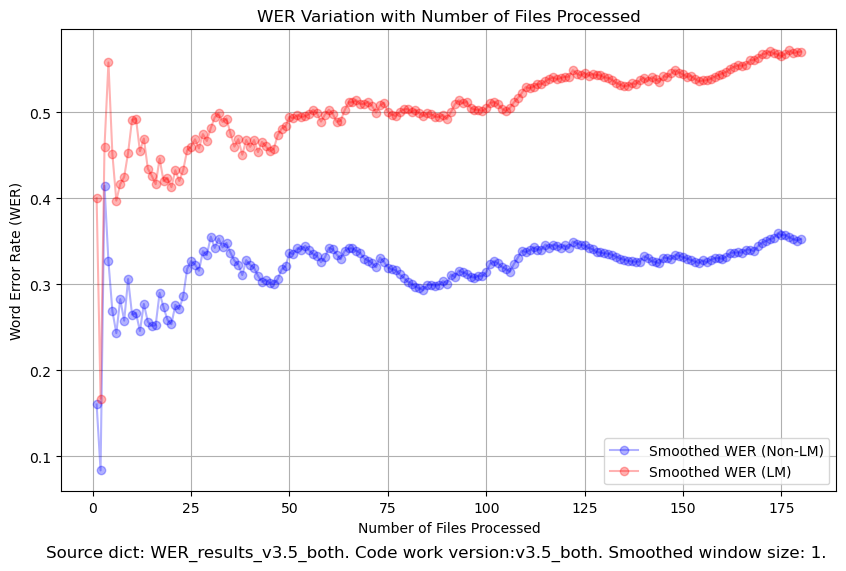

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the number of files processed and the corresponding WER values for both models
num_files_processed = []
wer_values_non_lm = []
wer_values_lm = []

# Iterate over the number of files processed
for i in range(1, len(WER_results) + 1):
    # Initialize variables to accumulate totals for both models
    overall_total_asr_deletions_non_lm = 0
    overall_total_asr_additions_non_lm = 0
    overall_total_asr_substitutions_non_lm = 0
    overall_total_tokens_non_lm = 0
    
    overall_total_asr_deletions_lm = 0
    overall_total_asr_additions_lm = 0
    overall_total_asr_substitutions_lm = 0
    
    # Calculate overall totals for both models for the first i files
    for result in WER_results[:i]:
        if isinstance(result, dict):
            overall_total_asr_deletions_non_lm += result.get("asr_deletions", 0)
            overall_total_asr_additions_non_lm += result.get("asr_additions", 0)
            overall_total_asr_substitutions_non_lm += result.get("asr_substitutions", 0)
            overall_total_tokens_non_lm += result.get("tokens", 0)
            
            overall_total_asr_deletions_lm += result.get("asr_deletions_lm", 0)
            overall_total_asr_additions_lm += result.get("asr_additions_lm", 0)
            overall_total_asr_substitutions_lm += result.get("asr_substitutions_lm", 0)
    
    # Calculate WER for both models
    if overall_total_tokens_non_lm > 0:
        wer_non_lm = (overall_total_asr_deletions_non_lm + overall_total_asr_additions_non_lm + overall_total_asr_substitutions_non_lm) / overall_total_tokens_non_lm
    else:
        wer_non_lm = 0
    
    if overall_total_tokens_non_lm > 0:
        wer_lm = (overall_total_asr_deletions_lm + overall_total_asr_additions_lm + overall_total_asr_substitutions_lm) / overall_total_tokens_non_lm
    else:
        wer_lm = 0
    
    # Append the number of files processed and the WER values to the lists
    num_files_processed.append(i)
    wer_values_non_lm.append(wer_non_lm)
    wer_values_lm.append(wer_lm)

# Define a function to calculate the moving average
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    sma = np.convolve(values, weights, 'valid')
    return sma

# Calculate the moving average of the WER values for both models with a window size
window_size = 1  # Adjust this value as needed
smoothed_wer_values_non_lm = moving_average(wer_values_non_lm, window_size)
smoothed_wer_values_lm = moving_average(wer_values_lm, window_size)

# Adjust the num_files_processed to match the length of the smoothed WER values
adjusted_num_files_processed = num_files_processed[window_size-1:]

# Plot the WER values and the smoothed WER values for both models
plt.figure(figsize=(10, 6))
plt.plot(adjusted_num_files_processed, smoothed_wer_values_non_lm, marker='o', linestyle='-', color='b', alpha=0.3, label='Smoothed WER (Non-LM)')
plt.plot(adjusted_num_files_processed, smoothed_wer_values_lm, marker='o', linestyle='-', color='r', alpha=0.3, label='Smoothed WER (LM)')
plt.xlabel('Number of Files Processed')
plt.ylabel('Word Error Rate (WER)')
plt.title('WER Variation with Number of Files Processed')
plt.legend()
plt.grid(True)

# Add text at the bottom of the plot
bottom_text = f"Source dict: {wer_plot_from_version[:-4]} Code work version:{work_version}. Smoothed window size: {window_size}."
plt.figtext(0.5, 0.001, bottom_text, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig('wer_plot.png', dpi=300, bbox_inches='tight')
plt.show()


### Results WER_results_LM

In [34]:
# Calculate overall totals across all runs for LM results
overall_total_asr_deletions_LM = sum(result.get("asr_deletions", 0) for result in WER_results_LM if isinstance(result, dict))
overall_total_asr_additions_LM = sum(result.get("asr_additions", 0) for result in WER_results_LM if isinstance(result, dict))
overall_total_asr_substitutions_LM = sum(result.get("asr_substitutions", 0) for result in WER_results_LM if isinstance(result, dict))
overall_total_tokens_LM = sum(result.get("tokens", 0) for result in WER_results_LM if isinstance(result, dict))

# Calculate overall error rate for LM results
total_files_with_error_rate_LM = sum(1 for result in WER_results_LM if isinstance(result, dict) and "error_rate" in result)
overall_total_error_rate_LM = sum(result["error_rate"] for result in WER_results_LM if isinstance(result, dict) and "error_rate" in result) / total_files_with_error_rate_LM if total_files_with_error_rate_LM > 0 else 0

# Print overall totals including substitutions for LM results
print(f"Overall Total ASR Deletions (LM): {overall_total_asr_deletions_LM}")
print(f"Overall Total ASR Additions (LM): {overall_total_asr_additions_LM}")
print(f"Overall Total ASR Substitutions (LM): {overall_total_asr_substitutions_LM}")
print(f"Overall Total Original Tokens (LM): {overall_total_tokens_LM}\n")

# Calculate WER for LM results
wer_LM = (overall_total_asr_deletions_LM + overall_total_asr_additions_LM + overall_total_asr_substitutions_LM) / overall_total_tokens_LM if overall_total_tokens_LM > 0 else 0

# Print WER for LM results
print(f"Overall Word Error Rate (WER) for LM: {wer_LM:.4f}\n")

# Print number of individual files processed for LM results
num_files_processed_LM = len([result for result in WER_results_LM if isinstance(result, dict)])
print(f"Number of individual files processed for LM: {num_files_processed_LM}\n")


Overall Total ASR Deletions (LM): 0
Overall Total ASR Additions (LM): 0
Overall Total ASR Substitutions (LM): 0
Overall Total Original Tokens (LM): 0

Overall Word Error Rate (WER) for LM: 0.0000

Number of individual files processed for LM: 0



## Run WER matchin BATCH -- KINDA BUSTED EH

In [20]:
debug_printing = False

In [21]:
import torchaudio
from torchaudio.transforms import Resample
from torch.utils.data import Dataset, DataLoader
import torch

class AudioDataset(Dataset):
    def __init__(self, file_list, target_sr=16000):
        self.file_list = file_list
        self.target_sr = target_sr

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        input_file = self.file_list[idx]
        speech, sample_rate = torchaudio.load(input_file)
        if sample_rate != self.target_sr:
            resampler = Resample(orig_freq=sample_rate, new_freq=self.target_sr)
            speech = resampler(speech)
        return speech.squeeze(0), self.target_sr


In [27]:
### DEFINING BATCH PROCESSING ####
from multiprocessing import Pool, cpu_count
from tqdm import tqdm
import os
import random


def process_transcribe_batch(batch, target_sr=16000, device=device, debug_printing=debug_printing):
    all_speech = []

    # Load and resample all audio files in the batch
    for input_file, transcription in batch:
        
        speech, sample_rate = torchaudio.load(filename)
        
        if sample_rate != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
            speech = resampler(speech)
            
        all_speech.append(speech)

        # Pad sequences to the same length
        max_length = max(s.shape[1] for s in all_speech)
        padded_speech = [torch.nn.functional.pad(s, (0, max_length - s.shape[1])) for s in all_speech]
    
        # Stack all padded speech into a single tensor
        input_values = torch.stack(padded_speech).squeeze(1).to(device)
    
        if debug_printing:
            print("input_values.shape:", input_values.shape)
    
        # Process the batch with the processor
        input_values = processor0(input_values, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)
    
        if debug_printing:
            print("input_values.shape after processor:", input_values.shape)
    
        # Fix batches shape
        input_values = input_values.squeeze(0)
    
        if debug_printing:
            print("input_values.shape after remix:", input_values.shape)
        
        # Perform inference
        with torch.inference_mode():
            logits = model0(input_values).logits
    
        if debug_printing:
            print("Logits shape:", logits.shape)
    
        # Get the predicted token IDs (greedy decoding)
        predicted_ids = torch.argmax(logits, dim=-1)
    
        if debug_printing:
            print("Predicted IDs shape:", predicted_ids.shape)
    
        # Convert predicted IDs to numpy array
        predicted_ids = predicted_ids.cpu().numpy()
    
        if debug_printing:
            print("Predicted IDs (numpy):", predicted_ids)
    
        # Decode the predicted IDs
        transcriptions = processor0.batch_decode(predicted_ids)
    
        if debug_printing:
            print("Transcriptions:", transcriptions)
    
        return transcriptions

# Function to process a single file's transcription
def process_file(input_file):
    # Retrieve original transcription from dictionary
    original_transcription = ' '.join(audio_transcriptions[input_file])
    
    # Tokenize original and ASR transcriptions
    original_tokens = tokenize_text(original_transcription)
    asr_tokens = tokenize_text(process_transcribe_batch([input_file], target_sr=16000, device=device)[0])  # Process single file

    # Normalize ASR tokens
    normalized_asr_tokens = normalize_numbers(asr_tokens, norm_nums)

    # Align ASR tokens with original tokens based on character similarity
    aligned_asr_tokens = align_tokens(original_tokens, normalized_asr_tokens, similarity_threshold=similarity_threshold)

    # Calculate error metrics
    asr_deletion = len(original_tokens) - len(aligned_asr_tokens)
    asr_addition = len(normalized_asr_tokens) - len(aligned_asr_tokens)

    substitutions = sum(1 for orig_token, asr_token in zip(original_tokens, aligned_asr_tokens) if orig_token != asr_token)

    total_tokens = len(original_tokens)
    error_rate = (asr_deletion + asr_addition + substitutions) / total_tokens

    # Prepare file result
    file_result = {
        "input_file": input_file,
        "tokens": total_tokens,
        "asr_deletions": asr_deletion,
        "asr_additions": asr_addition,
        "asr_substitutions": substitutions,
        "error_rate": error_rate
    }

    return file_result


print("Batching online.")

Batching online.


In [28]:
WER_results_batch = []

In [ ]:
# Number of CPU cores
num_processes = cpu_count()
print(f"Number of CPU cores: {num_processes}")

num_runs = 2  # Number of runs to average over, each time picking anew randoms
batch_size = num_processes  # Number of files to process per batch
max_files_to_process = 20  # Adjust this as needed

transcription_list = list(audio_transcriptions.keys())  # Assuming audio_transcriptions is a dictionary with file paths
shuffle_transcript = True  # Ensure shuffle_transcript is defined

# Iterate over each run
for run in range(num_runs):
    total_asr_deletions = 0
    total_asr_additions = 0
    total_asr_substitutions = 0
    total_tokens = 0
    total_error_rate = 0.0
    n = 0  # Number of files processed
    
    # Shuffle the transcription list for each run if needed
    if shuffle_transcript:
        random.shuffle(transcription_list)
    
    # Process in batches using multiprocessing
    with Pool(num_processes) as pool:
        # Split transcription_list into chunks of batch_size
        batches = [transcription_list[i:i + batch_size] for i in range(0, min(max_files_to_process, len(transcription_list)), batch_size)]
        
        # Process each batch asynchronously
        with tqdm(total=len(batches), desc=f"Run {run+1}") as pbar:
            for batch in batches:
                # Process batch asynchronously
                batch_results = pool.map(process_file, batch)
                
                # Update progress bar
                pbar.update(1)
                
                # Accumulate results and calculate metrics for this batch
                for result in batch_results:
                    total_asr_deletions += result["asr_deletions"]
                    total_asr_additions += result["asr_additions"]
                    total_asr_substitutions += result["asr_substitutions"]
                    total_tokens += result["tokens"]
                    total_error_rate += result["error_rate"]
                    n += 1  # Increment file counter
    
    # Calculate average error metrics for this run
    if n > 0:
        average_asr_deletions = total_asr_deletions / n
        average_asr_additions = total_asr_additions / n
        average_asr_substitutions = total_asr_substitutions / n
        average_error_rate = total_error_rate / n
    else:
        average_asr_deletions = 0
        average_asr_additions = 0
        average_asr_substitutions = 0
        average_error_rate = 0.0
    
    # Print or use the average error metrics for the run as needed
    print(f"Average ASR Deletions: {average_asr_deletions}")
    print(f"Average ASR Additions: {average_asr_additions}")
    print(f"Average ASR Substitutions: {average_asr_substitutions}")
    print(f"Average Error Rate (WER): {average_error_rate}")

Number of CPU cores: 12


Run 1:   0%|                                                                                     | 0/2 [00:00<?, ?it/s]

# x scrap later

In [ ]:
num_processes = cpu_count()  # Number of CPU cores
print(num_processes)

num_runs = 2  # Number of runs to average over, each time picking anew randoms
batch_size = num_processes  # Number of files to process per batch
max_files_to_process = 20  # Adjust this as needed

transcription_list = list(audio_transcriptions.items())  # Assume audio_transcriptions is defined somewhere
shuffle_transcript = True  # Ensure shuffle_transcript is defined

# Iterate over each run
for run in range(num_runs):
    total_asr_deletions = 0
    total_asr_additions = 0
    total_asr_substitutions = 0
    total_tokens = 0
    total_error_rate = 0.0
    n = 0  # Number of files processed
    
    # Shuffle the transcription list for each run if needed
    if shuffle_transcript:
        random.shuffle(transcription_list)
    
    # Process in batches using multiprocessing
    with Pool(num_processes) as pool:
        # Split transcription_list into chunks of batch_size
        batches = [transcription_list[i:i + batch_size] for i in range(0, min(max_files_to_process, len(transcription_list)), batch_size)]
        
        # Process each batch asynchronously
        with tqdm(total=len(batches), desc=f"Run {run+1}") as pbar:
            for result in pool.imap_unordered(process_transcribe_batch, batches):
                for j, (input_file, original_transcription) in enumerate(batches[n]):
                    tekst = result[j]
                    
                    # Get original transcription from dictionary
                    original_transcription = ' '.join(audio_transcriptions[input_file])
                    
                    # Tokenize both transcriptions
                    original_tokens = tokenize_text(original_transcription)
                    asr_tokens = tokenize_text(tekst)
                
                    # Normalize numbers in ASR tokens
                    normalized_asr_tokens = normalize_numbers(asr_tokens, norm_nums)
                
                    # Align ASR tokens with original tokens based on character similarity
                    aligned_asr_tokens = align_tokens(original_tokens, normalized_asr_tokens, similarity_threshold=similarity_threshold)
                
                    # Calculate error metrics
                    asr_deletion = len(original_tokens) - len(aligned_asr_tokens)
                    asr_addition = len(normalized_asr_tokens) - len(aligned_asr_tokens)
                    
                    # Calculate substitutions between original and aligned ASR tokens
                    substitutions = 0
                    for orig_token, asr_token in zip(original_tokens, aligned_asr_tokens):
                        if orig_token != asr_token:
                            substitutions += 1
                    
                    total_asr_substitutions += substitutions
                    total_tokens = len(original_tokens)
                    error_rate = (asr_deletion + asr_addition + substitutions) / total_tokens
                
                    # Accumulate metrics
                    total_asr_deletions += asr_deletion
                    total_asr_additions += asr_addition
                    total_error_rate += error_rate
                    n += 1
        
                    # Store individual file results for this run including substitutions
                    file_result = {
                        "input_file": input_file,
                        "tokens": total_tokens,
                        "asr_deletions": asr_deletion,
                        "asr_additions": asr_addition,
                        "asr_substitutions": substitutions,
                        "error_rate": error_rate
                    }
                    
                    # Update tqdm progress bar
                    pbar.update(1)
                    
                    # Print or use the error metric for each file as needed
                    if debug_printing:
                        print(f"Transcription {n}: {tekst}")
                        print(f"original_tokens: \n{original_tokens}\n")
                        print(f"asr_tokens: \n{asr_tokens}\n")
                        print(f"normalized_asr_tokens: \n{normalized_asr_tokens}\n")
                        print(f"aligned_asr_tokens: \n{aligned_asr_tokens}\n")
                        print(f"ASR Deletions: {asr_deletion}")
                        print(f"ASR Additions: {asr_addition}")
                        print(f"Total Tokens: {len(original_tokens)}")
                        print(f"Error Rate (WER): {error_rate}\n")

# Calculate average error metrics for this run
average_asr_deletions = total_asr_deletions / n
average_asr_additions = total_asr_additions / n
average_asr_substitutions = total_asr_substitutions / n
average_error_rate = total_error_rate / n

# Print or use the average error metrics for the run as needed
print(f"Average ASR Deletions: {average_asr_deletions}")
print(f"Average ASR Additions: {average_asr_additions}")
print(f"Average ASR Substitutions: {average_asr_substitutions}")
print(f"Average Error Rate (WER): {average_error_rate}")